In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [10]:
# Path
path_FD = '/home/yassinebha/tmp/group_motion/qc_scrubbing_group.csv'
path_root = '/home/yassinebha/data/data_disk/Drive/HCP2/'
path_solar_out = os.path.join(path_root,'Solar_heritability/HCP_subtype/')

In [15]:
df_FD = pd.read_csv(path_FD).rename(columns={' ': 'ID'})
df_FD

,ID,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [11]:
df_raw = df_[df_FD.Trait.str.contains('_FD_')]
task_ = [row.Trait.split('_')[0] for ind,row in df_raw.iterrows()]
    FD_ = ['FD','FD_scrubbed']

SyntaxError: invalid syntax (<ipython-input-11-61a8fd0c9832>, line 1)

In [12]:
# list tasks folders
list_fold = ['subtype_5_wm_23-01-2018',
             'subtype_5_social_23-01-2018',
             'subtype_5_relational_23-01-2018',
             'subtype_5_motor_23-01-2018',
             'subtype_5_language_23-01-2018',
             'subtype_5_gambling_23-01-2018',
             'subtype_5_emotion_23-01-2018']
list_task = [task.split('_')[2] for task in list_fold]

In [13]:
df_all = pd.DataFrame()
df_all_FD = pd.DataFrame()
for folder in list_fold:
    task_name = folder.split('_')[2]
    df_ = pd.read_csv(os.path.join(path_solar_out,folder,'{}_h2r_raw.csv'.format(task_name)))
    # WARNING : enforce relational value because heritability is null
    if task_name == 'relational':
        line = pd.DataFrame({"Trait": 'REL_FD_scrubbed_mean_norm',
                             "H2r": 0,
                             "P": 0,
                             "CovVarianceExpl": 0},index=[1])
        df_ = df_.append(line)
    df_raw = df_[df_.Trait.str.contains('_FD_')]
    task_ = [row.Trait.split('_')[0] for ind,row in df_raw.iterrows()]
    FD_ = ['FD','FD_scrubbed']
    
    df_FD = pd.DataFrame([task_,FD_]).T
    df_all_FD = df_all_FD.append(df_FD)
    df_all = df_all.append(df_raw)

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [14]:
df_all.reset_index(drop=True,inplace=True)
df_all

,CovVarianceExpl,H2r,P,Trait
0,0.822650,0.449838,2.000000e-07,WM_FD_mean_norm
1,0.952032,0.037100,3.021140e-01,WM_FD_scrubbed_mean_norm
2,0.790161,0.303006,6.490000e-05,SOC_FD_mean_norm
3,0.935168,0.053441,2.178340e-01,SOC_FD_scrubbed_mean_norm
4,0.850358,0.243918,1.196360e-02,REL_FD_mean_norm
5,0.000000,0.000000,0.000000e+00,REL_FD_scrubbed_mean_norm
6,0.803055,0.212611,3.801000e-03,MOT_FD_mean_norm
7,0.952982,0.072510,1.607772e-01,MOT_FD_scrubbed_mean_norm
8,0.831375,0.308855,8.680000e-05,LAN_FD_mean_norm
9,0.961540,0.044349,2.599000e-01,LAN_FD_scrubbed_mean_norm


In [15]:
# put column name
df_all_FD.columns = ['task','FD']

# Reset index 
df_all_FD.reset_index(drop=True,inplace=True)
df_all_FD

,task,FD
0,WM,FD
1,WM,FD_scrubbed
2,SOC,FD
3,SOC,FD_scrubbed
4,REL,FD
5,REL,FD_scrubbed
6,MOT,FD
7,MOT,FD_scrubbed
8,LAN,FD
9,LAN,FD_scrubbed


In [16]:
# Join two dataframe
df_final = df_all_FD.join(df_all)
df_final

,task,FD,CovVarianceExpl,H2r,P,Trait
0,WM,FD,0.822650,0.449838,2.000000e-07,WM_FD_mean_norm
1,WM,FD_scrubbed,0.952032,0.037100,3.021140e-01,WM_FD_scrubbed_mean_norm
2,SOC,FD,0.790161,0.303006,6.490000e-05,SOC_FD_mean_norm
3,SOC,FD_scrubbed,0.935168,0.053441,2.178340e-01,SOC_FD_scrubbed_mean_norm
4,REL,FD,0.850358,0.243918,1.196360e-02,REL_FD_mean_norm
5,REL,FD_scrubbed,0.000000,0.000000,0.000000e+00,REL_FD_scrubbed_mean_norm
6,MOT,FD,0.803055,0.212611,3.801000e-03,MOT_FD_mean_norm
7,MOT,FD_scrubbed,0.952982,0.072510,1.607772e-01,MOT_FD_scrubbed_mean_norm
8,LAN,FD,0.831375,0.308855,8.680000e-05,LAN_FD_mean_norm
9,LAN,FD_scrubbed,0.961540,0.044349,2.599000e-01,LAN_FD_scrubbed_mean_norm


In [45]:
coll_list

['#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300',
 '#0056c4',
 '#6aa300']

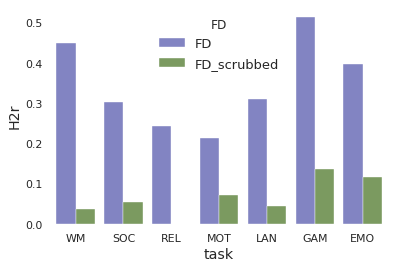

In [63]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456"]

coll_list = coll_ * len(df_final.task.unique())
sns.set(style="white", context="talk")

plt.figure(figsize=(6,4))
ax = sns.barplot(x='task', y='H2r',hue = 'FD',edgecolor='white',data=df_final,palette=coll_)

sns.despine(bottom=True, left=True)
for item in ax.get_xticklabels():
    item.set_rotation(0)
    item.set_fontsize(11)
for item in ax.get_yticklabels():
    item.set_rotation(0)
    item.set_fontsize(11)
    
plt.savefig(os.path.join(path_root,'subtypes_scores/26-10-2016/Figures/FD_heritability/FD_herit.svg'))